In [ ]:
##Load the dataset and examine the columns
import pandas as pd
import numpy as np

data=pd.read_csv('/Users/toshitha/Downloads/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Use TV, Radio, and Newspaper advertising spends as input features.
X=data[['TV','Radio','Newspaper']]
X


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [9]:
y=data['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
#Build a model that learns the relationship between advertising spends and sales.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [15]:
new_budget = pd.DataFrame([[150, 20, 30]],
                          columns=['TV', 'Radio', 'Newspaper'])

predicted_sales = model.predict(new_budget)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 15.039523680317235


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.9077569102710923
R² Score: 0.9059011844150826


In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)
print("Intercept:", model.intercept_)


     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337
Intercept: 4.714126402214131


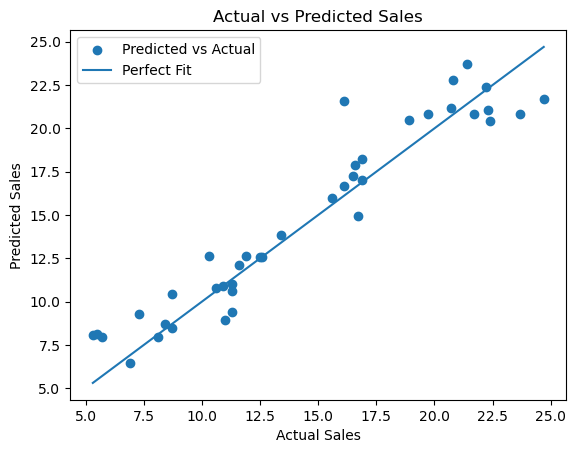

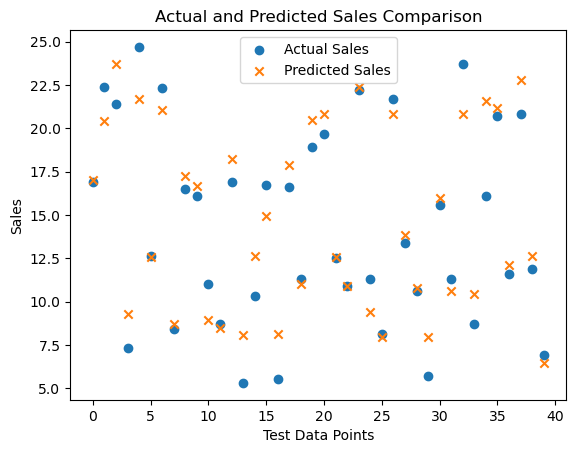

In [19]:
# Plot 1: Actual vs Predicted (diagonal comparison)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         label="Perfect Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


# Plot 2: Actual and Predicted values (different colors)
plt.figure()
plt.scatter(range(len(y_test)), y_test, label="Actual Sales", marker='o')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Sales", marker='x')
plt.xlabel("Test Data Points")
plt.ylabel("Sales")
plt.title("Actual and Predicted Sales Comparison")
plt.legend()
plt.show()